In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout,GRU, Embedding, Conv1D,Conv2D, Conv3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD





In [2]:
print(tf.version)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


<module 'tensorflow._api.v2.version' from 'C:\\Users\\Miguel\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>
Num GPUs Available:  1


In [3]:
#Cargamos el dataset
import pathlib
data_dir = r"C:\Users\Miguel\OneDrive - Universidad de Oviedo\TFG\Bases de datos\ICHBI\DATASETS\CICLOS_SINFILTRO\Balanceado_2_clases\dataset"
data_dir = pathlib.Path(data_dir)


In [4]:
#comprobamos que esta cargado correctamente
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)


6400


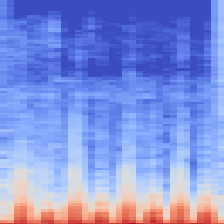

In [5]:
#obtenemos un ejemplo
crackles = list(data_dir.glob('normal/*'))
PIL.Image.open(str(crackles[0]))


In [6]:
altura_imagen, anchura_imagen= 224,224
batch_size=64
train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=17,
    label_mode='categorical',
    image_size=(altura_imagen,anchura_imagen),
    batch_size=batch_size)

Found 6400 files belonging to 2 classes.
Using 5120 files for training.


In [97]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=17,
    label_mode='categorical',
    image_size=(altura_imagen, anchura_imagen),
    batch_size=batch_size)


Found 6400 files belonging to 2 classes.
Using 1280 files for validation.


In [98]:
class_names=train_ds.class_names
print(class_names)

['anomalo', 'normal']


In [99]:

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False, input_shape=(224,224,3),pooling='avg', classes=2,weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable=False

resnet_model.add(pretrained_model)

#############Base################
#resnet_model.add(Flatten())
#resnet_model.add(Dense(1024, activation='relu'))
#################################

#############2D2Drop##############
resnet_model.add(Flatten())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dropout(0.5))
###################################

##################Progresivo####################
#resnet_model.add(Dense(2048, activation='relu'))
#resnet_model.add(Dropout(0.5))
#resnet_model.add(Dense(1024, activation='relu'))
#resnet_model.add(Dropout(0.25))
#resnet_model.add(Dense(512, activation='relu'))
#resnet_model.add(Dropout(0.1))
################################################


resnet_model.add(Dense(2, activation='softmax'))


In [100]:
resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_16 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dropout_7 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)              

In [101]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [102]:
epochs=100
history= resnet_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/100
80/80 [==============================] - 16s 172ms/step - loss: 0.8464 - accuracy: 0.5322 - val_loss: 0.6610 - val_accuracy: 0.6070
Epoch 2/100
80/80 [==============================] - 13s 166ms/step - loss: 0.6835 - accuracy: 0.5744 - val_loss: 0.6443 - val_accuracy: 0.6352
Epoch 3/100
80/80 [==============================] - 13s 164ms/step - loss: 0.6550 - accuracy: 0.6125 - val_loss: 0.6327 - val_accuracy: 0.6508
Epoch 4/100
80/80 [==============================] - 13s 165ms/step - loss: 0.6410 - accuracy: 0.6240 - val_loss: 0.6344 - val_accuracy: 0.6539
Epoch 5/100
80/80 [==============================] - 17s 214ms/step - loss: 0.6246 - accuracy: 0.6488 - val_loss: 0.6096 - val_accuracy: 0.6695
Epoch 6/100
80/80 [==============================] - 14s 177ms/step - loss: 0.6217 - accuracy: 0.6525 - val_loss: 0.6315 - val_accuracy: 0.6453
Epoch 7/100
80/80 [==============================] - 13s 164ms/step - loss: 0.6058 - accuracy: 0.6678 - val_loss: 0.6192 - val_accuracy:

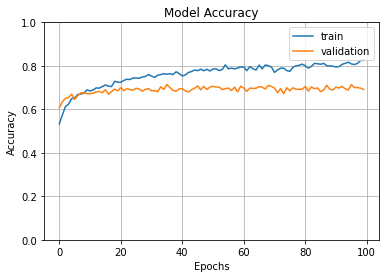

In [103]:
fig1=plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

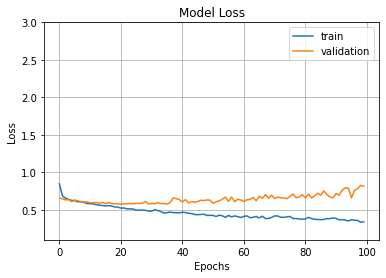

In [104]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0.1, ymax=3)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


In [105]:
resnet_model.save(
    r'C:\Users\Miguel\OneDrive - Universidad de Oviedo\TFG\Bases de datos\Codigo\ModelosEntrenados\ResNet50_Balanced2_Butter_Prog_80_20.h5')
